# Volcano Plots
# Phase 2 vs. Phase 2

using results from [deseq_p2.v.p2.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/phase2_v_phase2/deseq_p2.v.p2.ipynb) to generate publication-formatted volcano plots

## 0. load libraries

In [56]:
library(tidyverse) # for ggplot and dplyr
library(cowplot) # for combining plots

## 1. Load CSVs


From looking at differnet comparisons, the DESeq analysis resulted in 36 output files. These contain *all genes*. Here, I start by assigning directionality for genes and write CSVs that contain only DEGs.

In [36]:
# get list of files
files <- list.files(
    path = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/all_genes',
    pattern = '\\.csv$',
    full.names = TRUE
    )

head(files)

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/all_genes/bb_cc.csv"
[2] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/all_genes/bc_bb.csv"
[3] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/all_genes/bc_cb.csv"
[4] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/all_genes/bc_cc.csv"
[5] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/all_genes/bc_hc.csv"
[6] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/all_genes/bc_wc.csv"

The order of oyster treatment is intential - the oyster listed second is the 'baseline' from DESeq. In other words, If the file name is bb_cc.csv, then the LFC values are for BB in relation to CC (a +lfc = more expression in BB, a -lfc = more expression in CC)

I want to read in a csv, assign directionality to DEGs (or mark genes as not significant)

In [73]:
# create function
deg_list <- lapply(files, function(f) {

    # read file
  df <- read.csv(f)

    # get basename of file without extension (so just bb_cc if bb_cc.csv
  name <- tools::file_path_sans_ext(basename(f))
    # separate the two treatments (bb and cc)
  groups <- strsplit(name, "_")[[1]]
    # assign treatment names to variables
  g1 <- toupper(groups[1]) # BB
  g2 <- toupper(groups[2]) # CC

    # add comparison column
    df$pair <- paste(g2, 'vs.', g1)

  # set default for new col to NS (not significant)
  df$DEG_group <- "NS"

  # upregulated DEGs
  df$DEG_group[df$padj < 0.05 & df$log2FoldChange >  1] <- g1 # bb if cc is baseline

  # downregulated DEGs
  df$DEG_group[df$padj < 0.05 & df$log2FoldChange < -1] <- g2 

  df
})


In [74]:
# name list elements after the files
names(deg_list) <- tools::file_path_sans_ext(basename(files))

# basename() removes directory path, keeps only the filename
# tools::file_path_sans_exta(...) removes the file extension (.csv)
# names(deg_list) assigns those filenames as the names of the list elements
# now can access elements by name

writing out *only* DEGs for downstream analysis

In [75]:
out_dir <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/DEGs"  

for (nm in names(deg_list)) {

  df <- deg_list[[nm]]

  deg_df <- df[!is.na(df$DEG_group) & df$DEG_group != "NS", ]

  write.csv(
    deg_df,
    file = file.path(out_dir, paste0("DEG_", nm, ".csv")),
    row.names = FALSE
  )
}


## 2. using `ggplot` to make volcano plots

#### 1. single exposure experienced early in life affects GE
- CC vs. WC
- CC vs. HC
- CC vs. BC

In [76]:
# combining dfs
comp1 <- rbind(deg_list$wc_cc, deg_list$hc_cc, deg_list$bc_cc)

# check things look okay
head(comp1)
tail(comp1)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,pair,DEG_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111116054,8.9537018,1.293024e-04,0.015841000,0.44462567,0.6565903,1,0.9890587,CC vs. WC,NS
2,LOC111126949,558.9188428,-1.323929e-05,0.007964915,-0.08374105,0.9332623,1,0.9918466,CC vs. WC,NS
3,LOC111110729,112.7023690,1.003116e-04,0.006856086,0.55475854,0.5790598,1,0.9927748,CC vs. WC,NS
4,LOC111112434,7.0206931,-2.059278e-04,0.024757322,-0.40675851,0.6841854,1,0.9874490,CC vs. WC,NS
5,LOC111120752,427.4811709,-2.182863e-04,0.008789174,-1.12860132,0.2590661,1,0.9916810,CC vs. WC,NS
6,LOC111128944,0.1058866,0.000000e+00,0.402610923,0.00000000,1.0000000,NA,0.9670883,CC vs. WC,NS


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,pair,DEG_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
116509,ND4,199138.17,-6.287479e-05,0.01354313,-0.08714501,0.9305563,1,0.9640392,CC vs. BC,NS
116510,ND5,208616.94,1.001859e-04,0.01288097,0.14780783,0.8824944,1,0.9643749,CC vs. BC,NS
116511,ND6,62527.91,-9.738259e-04,0.02422810,-0.77951620,0.4356757,1,0.9589757,CC vs. BC,NS
116512,ND3,36885.41,4.926178e-05,0.01782914,0.04877820,0.9610961,1,0.9618640,CC vs. BC,NS
116513,ND1,180167.39,-2.798477e-05,0.01357477,-0.03860807,0.9692029,1,0.9641024,CC vs. BC,NS
116514,ND4L,12069.37,1.890937e-04,0.01631284,0.21221493,0.8319394,1,0.9623299,CC vs. BC,NS


Warning message:
“Removed 15508 rows containing missing values or values outside the scale range
(`geom_point()`).”


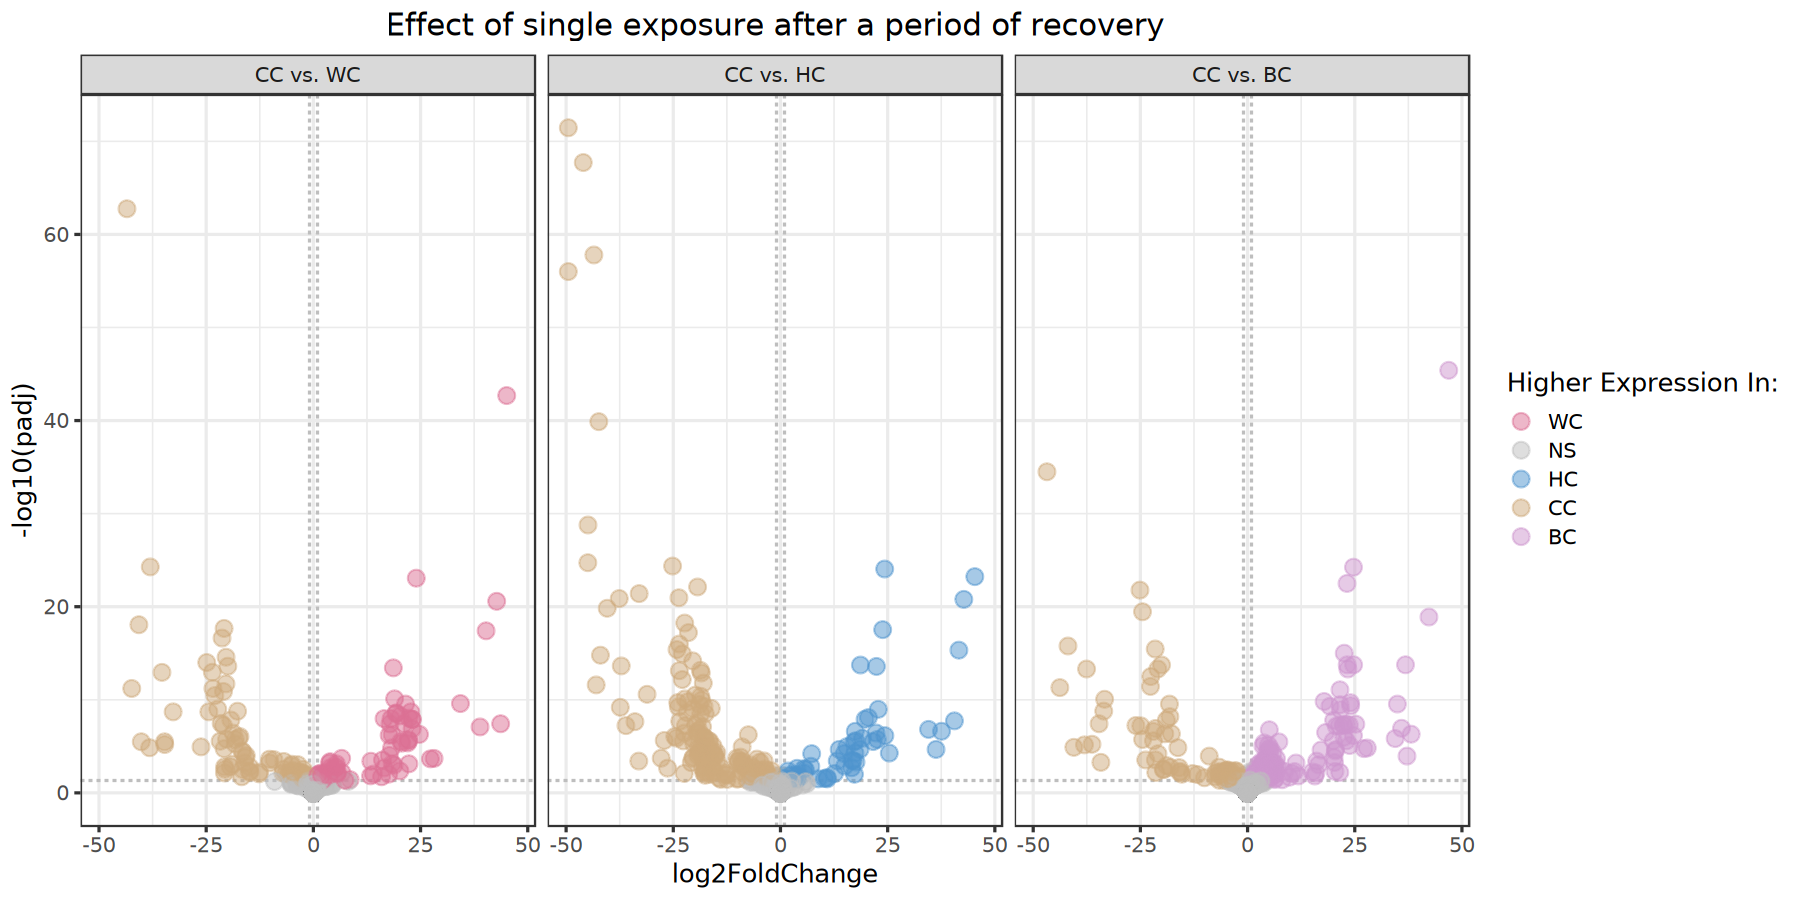

In [87]:
options(repr.plot.width=15, repr.plot.height=7.5)

# Specify the order for plots to follow Sophie's order
comp1$pair <- factor(comp1$pair, levels = c("CC vs. WC", "CC vs. HC", "CC vs. BC"))


comp1.plot <- ggplot(data = comp1,
                     aes(x = log2FoldChange,
                         y = -log10(padj),
                         col = DEG_group)) +
# fold change threshold line
geom_vline(xintercept = c(-1, 1), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
scale_color_manual(values = c("HC" = "steelblue3", "WC" = "palevioletred", "CC" = "burlywood3", "BC" = "plum3", "NS" = "grey")) +
facet_wrap(~pair) +
geom_point(size=4, alpha = 0.5) +
theme_bw(base_size = 15) +
theme(plot.title = element_text(hjust=.5)) + 
labs(col = 'Higher Expression In:',
    title = 'Effect of single exposure after a period of recovery') +
guides(col = guide_legend(reverse = TRUE))

comp1.plot

In [88]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/plots/comp1_volcano.pdf', comp1.plot, width=15, height=7.5)

Warning message:
“Removed 15508 rows containing missing values or values outside the scale range
(`geom_point()`).”
